# Capstone Project 2: Telcom Churn Classification Model

### Latar Belakang
Sebuah perusahaan telekomunikasi ingin meningkatkan profitabilitasnya melalui optimalisasi layanan agar dapat mengurangi tingkat *customer churn* (pelanggan yang berhenti berlangganan). 

*Customer churn* dalam industri telekomunikasi terjadi ketika seorang pelanggan membatalkan langganannya dan memutus hubungan dengan perusahaan. Kondisi ini sangat kritis bagi profitabilitas, karena biaya untuk mendapatkan pelanggan baru umumnya lebih tinggi dibandingkan dengan biaya mempertahankan pelanggan lama. Oleh karena itu, tingkat churn yang lebih rendah akan berkontribusi pada stabilitas pendapatan perusahaan, memungkinkan perusahaan untuk fokus pada ekspansi dan area peningkatan layanan lainnya.    


### Tujuan Perusahaan
Perusahaan ingin memanfaatkan model klasifikasi *machine learning* untuk menurunkan tingkat churn dengan cara memprediksi apakah seorang pelanggan berisiko tinggi untuk churn atau tidak. Dengan prediksi tersebut, perusahaan dapat mengidentifikasi pelanggan berisiko dan menyusun strategi retensi yang lebih tepat sasaran.


### Pernyataan Masalah
Dalam industri telekomunikasi, kehilangan pelanggan (*customer churn*) dapat menimbulkan dampak signifikan pada profitabilitas perusahaan. Hal ini terjadi karena biaya untuk mendapatkan pelanggan baru jauh lebih tinggi dibandingkan dengan biaya mempertahankan pelanggan yang sudah ada. Oleh sebab itu, mengurangi tingkat churn menjadi salah satu prioritas utama dalam strategi bisnis perusahaan telekomunikasi.  

### Tujuan Model
Tujuan dari proyek ini adalah membangun model *machine learning* yang mampu memprediksi apakah seorang pelanggan kemungkinan besar akan churn atau tetap bertahan. Model ini akan memanfaatkan berbagai fitur dalam profil pelanggan, sehingga perusahaan dapat secara proaktif mengidentifikasi pelanggan berisiko dan melakukan intervensi yang tepat untuk meningkatkan retensi.  

### Stakeholder
Stakeholder utama dari proyek ini adalah perusahaan telekomunikasi, khususnya anggota tim marketing dan product development yang bertanggung jawab dalam merancang serta menjual produk kepada customer. Proyek ini akan membantu mereka dalam memahami bagaimana cara merancang ulang atau memasarkan kembali produk agar lebih sesuai dengan kebutuhan customer maupun calon customer.

### Pendekatan
Proyek ini akan menggunakan pendekatan berbasis klasifikasi dengan menguji beberapa algoritma *machine learning* populer, seperti **Random Forest**, **K-Nearest Neighbors (KNN)**, serta algoritma klasifikasi lainnya. Hasil dari model akan dievaluasi menggunakan metrik yang relevan (misalnya *precision*, *recall*, *F1-score*, dll...) untuk memastikan performa yang optimal dalam memprediksi churn. Selain itu, analisis fitur juga akan dilakukan untuk mengidentifikasi faktor-faktor yang paling berpengaruh terhadap churn, sehingga dapat memberikan wawasan strategis bagi perusahaan.




## Data Understanding and Preprocessing

### Telco Customer Churn Features

| Feature            | Penjelasan                                                                  | Tipe Encoding            |
|--------------------|-----------------------------------------------------------------------------|--------------------------|
| Dependents         | Apakah pelanggan memiliki tanggungan atau tidak                             | Boolean (Yes/No)         |
| Tenure             | Jumlah bulan pelanggan telah berlangganan di perusahaan                     | Ordinal (Numerical)      |
| OnlineSecurity     | Apakah pelanggan memiliki layanan keamanan online atau tidak                | Non-Ordinal (Categorical)|
| OnlineBackup       | Apakah pelanggan memiliki layanan backup online atau tidak                  | Non-Ordinal (Categorical)|
| InternetService    | Jenis layanan internet yang digunakan (DSL, Fiber, None)                    | Non-Ordinal (Categorical)|
| DeviceProtection   | Apakah pelanggan memiliki perlindungan perangkat atau tidak                 | Non-Ordinal (Categorical)|
| TechSupport        | Apakah pelanggan memiliki dukungan teknis atau tidak                        | Non-Ordinal (Categorical)|
| Contract           | Jenis kontrak berlangganan (Bulanan, 1 Tahun, 2 Tahun)                      | Ordinal (Categorical)    |
| PaperlessBilling   | Apakah tagihan diberikan dalam bentuk paperless atau tidak                  | Boolean (Yes/No)         |
| MonthlyCharges     | Jumlah biaya layanan yang dibayarkan setiap bulan                           | Ordinal (Numerical)      |
| Churn (Target)     | Apakah pelanggan churn atau tidak                                           | Boolean (Yes/No)         |


> Mungkin sadar bahwa banyak dari feature data ini yes or no tapi kehitung sebagai non-ordinal bukan boolean. Ini sebab fitur tersebut mempunyai 3 jenis output: yes, no, no internet service. "No" != "No internet service" sebab orang yang memilih "No" itu **memilih** untuk tidak menggunakan sebuah fitur, sedangkan orang "No internet service" itu tidak punya pilihan lain sebab mereka tidak berlanggan dengan internet perusahaan kita.
>
> Perilaku orang "No" dengan orang "No internet service" akan berbeda, maka tipe encoding fitur tersebut harus dianggap sebagai non-ordinal.

In [1]:
# Main Imports

import pandas as pd
import numpy as np

# Set max columns
pd.set_option('display.max_columns', None)

# Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [2]:
# Viewing Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


> Terlihat dari call function info() bahwa dataset kita memiliki 4930 row dan tidak ada missing value di dataset kita. Namun kita harus *double check* karena kita nggak tahu jika ada data yang menggunakan whitespace ("") atau placeholdern lainnya ("?" atau "NA") sehingga tidak terdeteksi oleh info().

In [3]:
# Checking for Invalid Object Type Data

def validate_column(df, column, allowed_values):
    invalid_mask = ~df[column].isin(allowed_values)
    if invalid_mask.any():
        return False
    else:
        return True

rules = {
    "Dependents": ["Yes", "No"],
    "OnlineSecurity": ["Yes", "No", "No internet service"],
    "OnlineBackup": ["Yes", "No", "No internet service"],
    "InternetService": ["DSL", "Fiber optic", "No"],
    "DeviceProtection": ["Yes", "No", "No internet service"],
    "TechSupport": ["Yes", "No", "No internet service"],
    "Contract": ["Month-to-month", "One year", "Two year"],
    "PaperlessBilling": ["Yes", "No"],
    "Churn": ["Yes", "No"]
}

for col, allowed in rules.items():
    result = validate_column(df, col, allowed)
    print(f"{col}: {result}")

Dependents: True
OnlineSecurity: True
OnlineBackup: True
InternetService: True
DeviceProtection: True
TechSupport: True
Contract: True
PaperlessBilling: True
Churn: True


> Terlihat diatas bahwa dengan membuat function validate_column yang mengecek jika ada col dengan value yang tidak sesuai value yang di spesifikasi di dictionary "rules", kita dapat menjamin bahwa semua data yg tipe object sudah valid dan dapat digunakan.

In [4]:
# Checking for Invalid Numerical Type Data

col = ["tenure", "MonthlyCharges"]

for column in col:
    invalid_mask = df[column] < 0
    print(column)
    print(f"Invalid values: {invalid_mask.sum()}")
    print(f"Valid values: {(~invalid_mask).sum()}")
    print("")


tenure
Invalid values: 0
Valid values: 4930

MonthlyCharges
Invalid values: 0
Valid values: 4930



> Diatas telah kita lakukan validasi data untuk Numerical Type Data di dataset kita. Karena sudah kita jamin lewat info() bahwa tidak ada value null atau sejenisnya, kita gunakan invalid mask untuk mengecek:
> - Jika ada angka yang dibawah 0, karena tidak mungkin tenure atau monthly charge bisa angka negatif.
> - Jika ada object type string atau sejenisnya terkandung di column tenure dan MonthlyCharges, akan mengembalikan error TypeError. Karena program berjalan dengan lancar maka terjamin semua data itu angka.

In [5]:
# Checking for Duplicate Data Points

duplicates = df.duplicated()

if True in duplicates:
    print("Duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


> Dengan diatas ini, kita juga telah menjamin bahwa data kita tidak ada yang *duplicate* sehingga dapat menyebabkan overfitting karena model kita terlalu banyak dilatih mengunakkan data yang mirip.

Maka bisa kita jamin bahwa pada dataset kita ini tidak ada data yang invalid. Semua data ini tidak ada duplicate, tidak ada missing values, dan tidak ada data yang tidak sesuai dan tidak mengikuti "rules" yang telah dispesifikasi di dictionary.

Sehingga kita bisa lanjut dan menentukan data manakah yang paling penting dan relevan bagi konteks customer churn.  
  
.  
.  
.  
.

## Feature Engineering, Encoding, and Choosing

Untuk capstone ini saya ingin mencoba tes dataset telco churn menggunakan tiga classification model yang berbeda: Logisitc Regression, Random Forest, dan K Nearest Neighbor. Saya ingin melakukan ini agar dapat membandingkan hasil dari masing-masing model sehingga bisa menentukan model mana yang lebih efektif/akurat untuk konteks telco churn ini serta mengetahui faktor-faktor apa yang dapat membuat sebuah model jadi kurang akurat.

Namun ketika menggunakan beberapa model, kita harus menjaminkan bahwa data yang disediakan kepada model-model tersebut itu sesuai dengan keperluannya masing-masing; kadang ada model yang perlu data untuk discaling atau dalam bentuk ordinal sehingga harus menggunakan ordinal encoding, tapi kadang ada model yang tidak mempunyai requirement terlalu ketat.

Untuk mencari tahu keperluan masing-masing model, saya meminta ChatGPT untuk menghasilkan table berisi requirement masing-masing model untuk membandingkan kompatibilitas data.

### Tabel Perbandingan requirement Model

| Model              | Data Requirements                                                           | Notes                                                                 |
|--------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------|
| Logistic Regression| - Numerical features <br> - Dummy/One-hot encoding for categoricals <br> - Scaled features help | Sensitive to feature scale (normalize/standardize continuous vars). Assumes linear relationship between features & log-odds. |
| KNN                | - Numerical features <br> - One-hot encoding for categoricals <br> - Must be scaled | Extremely sensitive to scale, since distance metric is used.         |
| Random Forest      | - Handles categorical if encoded numerically (even label encoding works) <br> - Doesn’t require scaling | Trees split on thresholds, so scaling doesn’t matter. Can handle high cardinality features better. |


Terlihat dari table diatas bahwa requirement dari masing-masing model tidak jauh beda; semuanya memperlukan data yang di encoding menjadi angka baiklah itu ordinal encoding atau one-hot encoding, dan walaupun Random Forest tidak memperlukannya, KNN dan Logistic Regression sebaiknya menggunakan data yang telah di scaling ulang sehingga hasil modellingnya tidak berantakan.

Maka yang perlu kita lakukan selanjutnya adalah melakukan data scaling dan encoding sehingga data dapat digunakkan oleh masing-masing model. Saya menentukan jika sebuah feature akan di one-hot encoding atau di ordinal encoding tergantung table yang sudah dibuat di atas (dan saya tulis ulang di bawah ini).

| Feature            | Tipe Encoding            |
|--------------------|--------------------------|
| Dependents         | Boolean (Yes/No)         |
| Tenure             | Ordinal (Numerical)      |
| OnlineSecurity     | Non-Ordinal (Categorical)|
| OnlineBackup       | Non-Ordinal (Categorical)|
| InternetService    | Non-Ordinal (Categorical)|
| DeviceProtection   | Non-Ordinal (Categorical)|
| TechSupport        | Non-Ordinal (Categorical)|
| Contract           | Ordinal (Categorical)    |
| PaperlessBilling   | Boolean (Yes/No)         |
| MonthlyCharges     | Ordinal (Numerical)      |
| Churn (Target)     | Boolean (Yes/No)         |
  
.  
.  
.  
.
### Data Encoding

In [6]:
# Encoding non-ordinal columns with one-hot encoding

non_ordinal_list = ["OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport"]

# Saya menggunakan drop_first = true agar tidak kena isu Multicollinearity
encoded_df = pd.get_dummies(df, columns=non_ordinal_list, drop_first=True)
encoded_df.head()

,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,Yes,9,Month-to-month,Yes,72.90,Yes,False,False,False,False,False,False,False,True,False,True
1,No,14,Month-to-month,Yes,82.65,No,False,False,False,True,True,False,False,True,False,False
2,No,64,Two year,No,47.85,Yes,False,True,False,False,False,False,False,True,False,True
3,No,72,Two year,No,69.65,No,False,True,False,True,False,False,False,True,False,True
4,No,3,Month-to-month,Yes,23.60,No,True,False,True,False,False,True,True,False,True,False


In [7]:
# Encoding ordinal data with scikit ordinalEncoder

from sklearn.preprocessing import OrdinalEncoder

ordinal_list = "Contract" # Saya membiarkan Tenure dan MonthlyCharges sebab mereka sudah dalam bentuk numerical dan tidak perlu ordinalEncoder.

order_list = ["Month-to-month", "One year", "Two year"]

encoder = OrdinalEncoder(categories=[order_list])

encoded_df[ordinal_list] = encoder.fit_transform(encoded_df[[ordinal_list]])

encoded_df.head()

,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,Yes,9,0.0,Yes,72.90,Yes,False,False,False,False,False,False,False,True,False,True
1,No,14,0.0,Yes,82.65,No,False,False,False,True,True,False,False,True,False,False
2,No,64,2.0,No,47.85,Yes,False,True,False,False,False,False,False,True,False,True
3,No,72,2.0,No,69.65,No,False,True,False,True,False,False,False,True,False,True
4,No,3,0.0,Yes,23.60,No,True,False,True,False,False,True,True,False,True,False


In [8]:
# Converting all boolean columns into numerical data (yes = 1, no = 0)

# First mengubah semua yes-no menjadi True-False

convert_list = ["Dependents", "PaperlessBilling", "Churn"]

mapping = {"Yes": 1, "No" : 0}

encoded_df[convert_list] = encoded_df[convert_list].replace(mapping)

# Casting seluruh dataframe menjadi float

encoded_df = encoded_df.astype(float)

encoded_df.head()

C:\Users\aam71\AppData\Local\Temp\ipykernel_16272\4092771380.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df[convert_list] = encoded_df[convert_list].replace(mapping)


,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,1.0,9.0,0.0,1.0,72.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,14.0,0.0,1.0,82.65,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,64.0,2.0,0.0,47.85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,72.0,2.0,0.0,69.65,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,0.0,1.0,23.60,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0



> Diatas adalah hasil dari proses encoding dataset kita hingga menjadi nuemrical data yang bisa diproses oleh machine-learning model seperti Random Forest, KNN, dan Logistic Regression.  
  
.  
.  
.  
.
### Data Scaling

Berikut kita melakukan data scaling pada kolum-kolum tenure dan monthly charges sebab data mereka continuous dan sangat bervariasi. Data yang bervariasi / tinggi entropy itu susah bagi model-model seperti LogReg dan KNN untuk digunakkan sebab mereka sensitif terhadap jarak dan ukuran angka. Range dari data kita yang lain itu 0-2, jadi data point yang dapat mencapai 100 seperti yang di dalam tenure dan monthly charges bisa membuat model bingung dan "kepleset".

Sebab itu, kita menggunakan Scikit Standard Scaler; KNN dan LogReg membutuhkannya dan Random Forest tidak terpengaruhi olehnya.

In [9]:
# Scaling data using Standard Scaler

from sklearn import set_config
from sklearn.preprocessing import StandardScaler

# Set output secara global menjadi dataframe pandas
set_config(transform_output="pandas")
scale = StandardScaler()

temp_df = scale.fit_transform(encoded_df[["tenure", "MonthlyCharges"]])

scaled_df = encoded_df
scaled_df.update(temp_df)
scaled_df.head()

,Dependents,tenure,Contract,PaperlessBilling,MonthlyCharges,Churn,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,1.0,-0.955202,0.0,1.0,0.267938,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,-0.751110,0.0,1.0,0.593797,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.289814,2.0,0.0,-0.569268,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.616362,2.0,0.0,0.159319,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,-1.200113,0.0,1.0,-1.379738,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


  
.  
.  
.  
.
### Feature Selection

#### Hypothesis Test to Check Correlation

In [10]:
# Linear Correlation Measurement using Point-Biserial and Chi2

import scipy.stats as stats

correlation_frame = pd.DataFrame(columns=["Feature", "Statistic Value", "Probability Value", "Method"])


# Point-Biserial Correlation Coefficient -> "tenure" and "Monthly Charges"

r_tenure, p_tenure = stats.pointbiserialr(scaled_df["Churn"].to_numpy(), scaled_df["tenure"].to_numpy())

r_charge, p_charge = stats.pointbiserialr(scaled_df["Churn"].to_numpy(), scaled_df["MonthlyCharges"].to_numpy())


correlation_frame.loc[len(correlation_frame)] = ["Tenure", r_tenure, p_tenure, "Point-Biserial"]
correlation_frame.loc[len(correlation_frame)] = ["Monthly Charges", r_charge, p_charge, "Point-Biserial"]

correlation_frame.head()


,Feature,Statistic Value,Probability Value,Method
0,Tenure,-0.362734,3.391648e-153,Point-Biserial
1,Monthly Charges,0.193099,1.269335e-42,Point-Biserial


> Explain about stuff here; how p value works and whatnot.

In [11]:
# Non-linear Correlation Measurement using Chi Square

# Get old data table and remove unused columns
temp_df = df
temp_df = temp_df.drop(columns=["tenure", "MonthlyCharges", "Churn"])

for column in temp_df:
    contingency_matrix = pd.crosstab(temp_df[column], df["Churn"])
    chi_value, p_value, _, _ = stats.chi2_contingency(contingency_matrix)

    correlation_frame.loc[len(correlation_frame)] = [column, chi_value, p_value, "X\u00b2"]

correlation_frame = correlation_frame.sort_values(by="Probability Value", ascending=False)
correlation_frame

,Feature,Statistic Value,Probability Value,Method
2,Dependents,143.443931,4.700764e-33,X²
9,PaperlessBilling,174.755767,6.769257e-40,X²
1,Monthly Charges,0.193099,1.269335e-42,Point-Biserial
6,DeviceProtection,373.507074,7.833745e-82,X²
4,OnlineBackup,445.104879,2.221793e-97,X²
5,InternetService,514.527398,1.869800e-112,X²
7,TechSupport,558.486545,5.323383e-122,X²
3,OnlineSecurity,580.829899,7.488416e-127,X²
0,Tenure,-0.362734,3.391648e-153,Point-Biserial
8,Contract,870.121511,1.136356e-189,X²


> According to the hypothesis testing, Contract is most likely to be dependent to Churn while Dependents is least likely dependent to Churn. However, all probability values > 0.05 standard significance level for a hypothesis test, meaning all values are seemingly correlated/dependent to Churn.


#### Mutual Information to Check Usefulness/Impact on Results
Mutual Information requires all data to be in numeric form but NOT in one-hot encoded format. This means we need to create a new temporary dataframe that has our current correct columns + our one-hot encoded columns but encoded instead using ordinal encoder.

In [12]:
# Creating temporary dataframe for Mutual Information test

scaled = scaled_df[["tenure", "MonthlyCharges"]]

encoder = OrdinalEncoder()
temp_df = encoder.fit_transform(temp_df)

temp_df = pd.concat([temp_df, scaled], axis=1)
temp_df.head()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,tenure,MonthlyCharges
0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,-0.955202,0.267938
1,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,-0.751110,0.593797
2,0.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,1.289814,-0.569268
3,0.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,1.616362,0.159319
4,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,-1.200113,-1.379738


In [13]:
# Testing Mutual Information

from sklearn.feature_selection import mutual_info_classif

discrete_mask = [True, True, True, True, True, True, True, True, False, False]


mutual_info = mutual_info_classif(temp_df, encoded_df["Churn"], discrete_features = discrete_mask)
print(pd.Series(mutual_info, index=temp_df.columns))

Dependents          0.015743
OnlineSecurity      0.062892
OnlineBackup        0.048658
InternetService     0.055386
DeviceProtection    0.041831
TechSupport         0.060652
Contract            0.103190
PaperlessBilling    0.018605
tenure              0.080616
MonthlyCharges      0.049009
dtype: float64


In [14]:
# Testing Mutual Information with Permuted Churn

permuted_churn = pd.DataFrame()
permuted_churn["Churn"] = encoded_df["Churn"].sample(frac=1, random_state=42).reset_index(drop=True)

mutual_info = mutual_info_classif(temp_df, permuted_churn.to_numpy().flatten(), discrete_features = discrete_mask)
print(pd.Series(mutual_info, index=temp_df.columns))

Dependents          0.000013
OnlineSecurity      0.000111
OnlineBackup        0.000411
InternetService     0.000046
DeviceProtection    0.000527
TechSupport         0.000156
Contract            0.000362
PaperlessBilling    0.000375
tenure              0.000000
MonthlyCharges      0.000000
dtype: float64


> The testing using permuted churn shows significantly smaller values compared to the normal one, indicating that these churn values do indeed have a correlation with the features. Seeing as when randomized to show independence the values are lower than normal, combined with our previous hypothesis testing research, we can confidently conclude that there is strong correlation between our dataset and our target vector.

#### In summary:
Our hypothesis testing shows that our features are all strongly correlated with our churn results, as its probabilistically unlikely for us to get our current dataset assuming the dataset is independent to the churn results.

Our mutual information test shows that our features all have impact on the results of churning. Each feature reduces our uncertainty of churn and is not simply random noise. This is further shown when compared to a Mutual Information test using a randomized churn result, which results in each value being off by over 10^-2.

So it is fair to assume that we can include our full dataset in our model training as each feature helps in creating a more accurate predictive model.

However its important to note that the features "Dependents" and "PaperlessBilling" consistently have the lowest scores among all of the features. So for training purposes I will make two datasets: one with those features included, and one without. Then we can test to see if the removal of these features help in creating a more accurate predictive model.

### Data Splitting for Training and Testing
Considering the medium-large size of the dataset, we can split the data set 80/20, with 80% used for training and 20% used for testing. Since we want to have two variations (one with "Dependents" and "PaperlessBilling" and one without), we need to split the data first before removing the features.

In [15]:
# Splitting Encoded Dataset

from sklearn.model_selection import train_test_split

target_df = scaled_df["Churn"]
features_df = scaled_df.drop(columns=["Churn"])

features_train, features_test, target_train, target_test = train_test_split(
    features_df, 
    target_df, 
    test_size=0.2, 
    random_state=42,
    stratify=target_df
)

print("Training set size:", features_train.shape[0])
print("Testing set size:", features_test.shape[0])

# Making duplicates, removing "Dependents" and "PaperlessBilling"

features_train_cut = features_train.drop(columns=["Dependents", "PaperlessBilling"])
features_test_cut = features_test.drop(columns=["Dependents", "PaperlessBilling"])

features_train_cut

Training set size: 3944
Testing set size: 986


,tenure,Contract,MonthlyCharges,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
49,-0.342925,0.0,0.993183,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3598,1.167359,2.0,-1.508410,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1509,-0.832747,0.0,1.041645,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3309,0.881629,1.0,0.241201,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4901,-1.200113,0.0,0.184385,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,1.289814,1.0,0.934696,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3420,-0.220469,2.0,-1.515095,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2974,-1.118476,0.0,0.316400,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3913,-0.791928,0.0,1.014907,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Making the Models



In [16]:
# Importing necessary tools

# Core ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import learning_curve, StratifiedKFold

# Visualization
import matplotlib.pyplot as plt


In [17]:
print(encoded_df["Churn"].value_counts())

Churn
0.0    3614
1.0    1316
Name: count, dtype: int64


In [ ]:
# Creating Functions for Model Usage



# Cross Validation Strategy
cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


def compute_learning_curve(feature_matrix, target_vector, model, model_name, cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring='roc_auc') -> None: 

    train_sizes, train_scores, test_scores = learning_curve(
        model, feature_matrix, target_vector, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotting
    plt.figure(figsize=(7,5))

    plt.plot(train_sizes, train_scores_mean, marker='o', label='Training ' + scoring)
    plt.fill_between(train_sizes, train_scores_mean-2*train_scores_std, train_scores_mean+2*train_scores_std, alpha=0.15)

    plt.plot(train_sizes, test_scores_mean, marker='o', label='CV ' + scoring)
    plt.fill_between(train_sizes, test_scores_mean-2*test_scores_std, test_scores_mean+2*test_scores_std, alpha=0.15)

    plt.xlabel('Training samples')
    plt.ylabel(scoring)
    plt.title(model_name + " Learning Curve")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


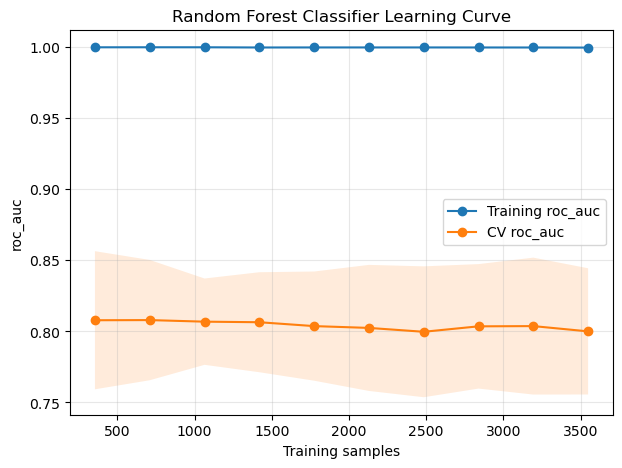

In [19]:
# Random Forest Classifier


# Define model
random_forest_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-3
)

compute_learning_curve(
    features_train, 
    target_train, 
    random_forest_model, 
    "Random Forest Classifier", 
    cross_validation
)

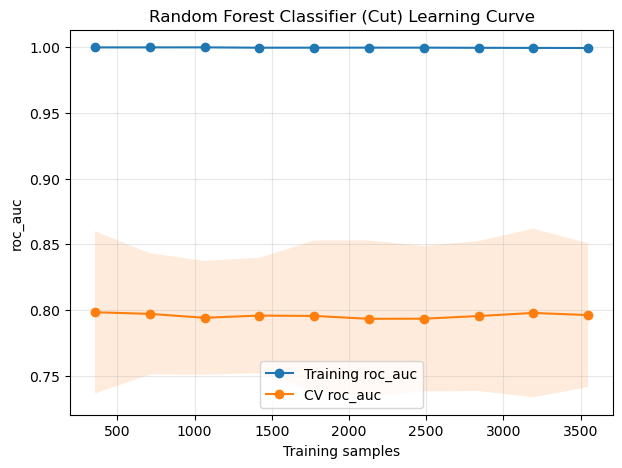

In [20]:
# Compute Learning Curve for Cut Data

# Define model
random_forest_model_cut = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-3
)

compute_learning_curve(
    features_train_cut, 
    target_train, 
    random_forest_model_cut, 
    "Random Forest Classifier (Cut)", 
    cross_validation
)


> Both models have a large gap between their training lines (representing the roc_auc results) and their cross-validation lines (testing using unforseen data); this indicates that the models are experiencing overfitting as the models adapt to the training data and all of its noise, becoming too complex and henceforth stunting its performance when used on test data.

> To counter overfitting in the case of random forest, we can adjust its hyperparameters to forcefully simplify the model and generalize its performance. 

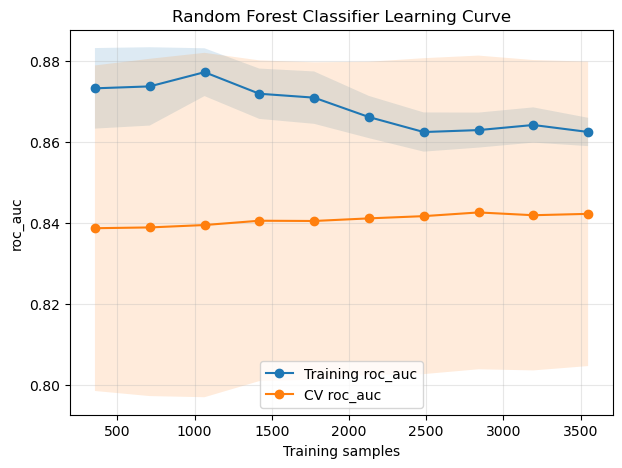

In [21]:
# Redoing Random Forest Classifier with hyperparameter tuning
random_forest_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=6,
    random_state=42,
    n_jobs=-3,
    min_samples_split=10,
    min_samples_leaf=15,
    max_features='log2'
)

compute_learning_curve(
    features_train, 
    target_train, 
    random_forest_model, 
    "Random Forest Classifier", 
    cross_validation
)

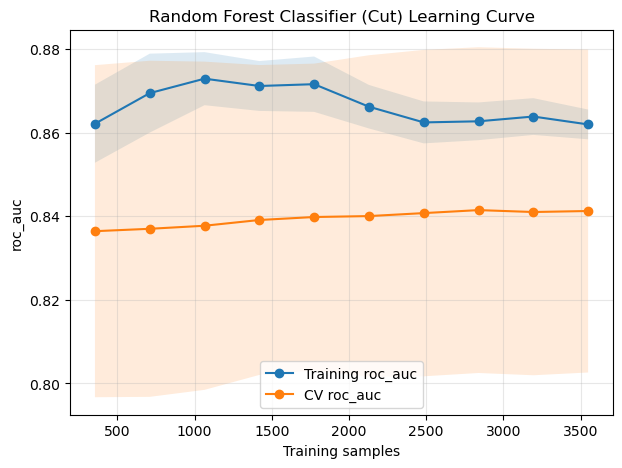

In [22]:
#  Redoing Random Forest Classifier with hyperparameter tuning on cut data
random_forest_model_cut = RandomForestClassifier(
    n_estimators=1000,
    max_depth=6,
    random_state=42,
    n_jobs=-3,
    min_samples_split=10,
    min_samples_leaf=15,
    max_features='log2'
)

compute_learning_curve(
    features_train_cut, 
    target_train, 
    random_forest_model_cut, 
    "Random Forest Classifier (Cut)", 
    cross_validation
)

In [23]:
# Fitting the final models for Random Forest Classifier

random_forest_model.fit(features_train, target_train)
random_forest_model_cut.fit(features_train_cut, target_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,6
,min_samples_split,10
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


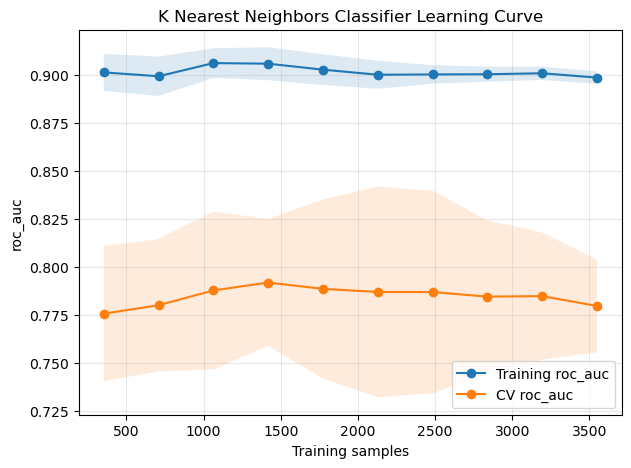

In [24]:
# K Nearest Neighbor Classifier

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='minkowski',
    n_jobs=-3
)

compute_learning_curve(
    features_train, 
    target_train, 
    knn_model, 
    "K Nearest Neighbors Classifier", 
    cross_validation
)



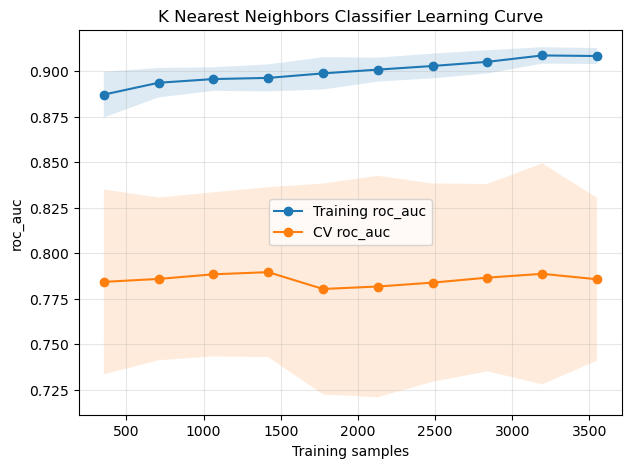

In [25]:
# K Nearest Neighbor Classifier on Cut Data

knn_model_cut = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='minkowski',
    n_jobs=-3
)

compute_learning_curve(
    features_train_cut, 
    target_train, 
    knn_model_cut, 
    "K Nearest Neighbors Classifier", 
    cross_validation
)



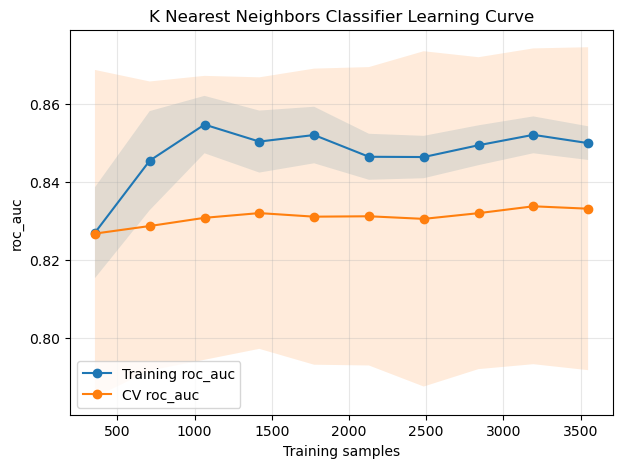

In [26]:
# K Nearest Neighbor Classifier with Hyperparameter Tuning

knn_model = KNeighborsClassifier(
    n_neighbors=40,
    weights='uniform',
    metric='cosine',
    n_jobs=-3
)

compute_learning_curve(
    features_train, 
    target_train, 
    knn_model, 
    "K Nearest Neighbors Classifier", 
    cross_validation
)

In [ ]:
# K Nearest Neighbor Classifier with Hyperparameter Tuning on Cut Data

knn_model_cut = KNeighborsClassifier(
    n_neighbors=40,
    weights='uniform',
    metric='cosine',
    n_jobs=-3
)

compute_learning_curve(
    features_train_cut, 
    target_train, 
    knn_model_cut, 
    "K Nearest Neighbors Classifier", 
    cross_validation
)

In [ ]:
# Fitting the final models for K Nearest Neighbor Classifier

knn_model.fit(features_train, target_train)
knn_model_cut.fit(features_train_cut, target_train)

In [ ]:
# Logistic Regression Classifier

logreg_model = LogisticRegression(
    penalty='l2',        # Ridge regularization (default)
    C=1.0,               # Inverse of regularization strength
    solver='lbfgs',      # Good for small/medium datasets, supports multinomial
    max_iter=1000,       # Increase if convergence warnings appear
    random_state=42
)

compute_learning_curve(
    features_train,
    target_train,
    logreg_model,
    "Logistic Regression",
    cross_validation
)

In [ ]:
# Logistic Regression Classifier on Cut Data

logreg_model_cut = LogisticRegression(
    penalty='l2',        # Ridge regularization (default)
    C=1.0,               # Inverse of regularization strength
    solver='lbfgs',      # Good for small/medium datasets, supports multinomial
    max_iter=1000,       # Increase if convergence warnings appear
    random_state=42
)

compute_learning_curve(
    features_train_cut,
    target_train,
    logreg_model,
    "Logistic Regression",
    cross_validation
)